# Stock Data Prep

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(1, './..')

In [178]:
from quantML import scrape
from quantML import preprocess
from quantML import ml

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Scraping

In [42]:
tickers = scrape.get_sp500_tickers()
price_df = scrape.get_prices(tickers, '2015-01-01', '2020-12-01',)

INFO:quantML.scrape:Scraping MMM - 1 out of 505 tickers
INFO:quantML.scrape:Scraping ABT - 2 out of 505 tickers
INFO:quantML.scrape:Scraping ABBV - 3 out of 505 tickers
INFO:quantML.scrape:Scraping ABMD - 4 out of 505 tickers
INFO:quantML.scrape:Scraping ACN - 5 out of 505 tickers
INFO:quantML.scrape:Scraping ATVI - 6 out of 505 tickers
INFO:quantML.scrape:Scraping ADBE - 7 out of 505 tickers
INFO:quantML.scrape:Scraping AMD - 8 out of 505 tickers
INFO:quantML.scrape:Scraping AAP - 9 out of 505 tickers
INFO:quantML.scrape:Scraping AES - 10 out of 505 tickers
INFO:quantML.scrape:Scraping AFL - 11 out of 505 tickers
INFO:quantML.scrape:Scraping A - 12 out of 505 tickers
INFO:quantML.scrape:Scraping APD - 13 out of 505 tickers
INFO:quantML.scrape:Scraping AKAM - 14 out of 505 tickers
INFO:quantML.scrape:Scraping ALK - 15 out of 505 tickers
INFO:quantML.scrape:Scraping ALB - 16 out of 505 tickers
INFO:quantML.scrape:Scraping ARE - 17 out of 505 tickers
INFO:quantML.scrape:Scraping ALXN - 1

INFO:quantML.scrape:Scraping DLR - 144 out of 505 tickers
INFO:quantML.scrape:Scraping DFS - 145 out of 505 tickers
INFO:quantML.scrape:Scraping DISCA - 146 out of 505 tickers
INFO:quantML.scrape:Scraping DISCK - 147 out of 505 tickers
INFO:quantML.scrape:Scraping DISH - 148 out of 505 tickers
INFO:quantML.scrape:Scraping DG - 149 out of 505 tickers
INFO:quantML.scrape:Scraping DLTR - 150 out of 505 tickers
INFO:quantML.scrape:Scraping D - 151 out of 505 tickers
INFO:quantML.scrape:Scraping DPZ - 152 out of 505 tickers
INFO:quantML.scrape:Scraping DOV - 153 out of 505 tickers
INFO:quantML.scrape:Scraping DOW - 154 out of 505 tickers
INFO:quantML.scrape:Scraping DTE - 155 out of 505 tickers
INFO:quantML.scrape:Scraping DUK - 156 out of 505 tickers
INFO:quantML.scrape:Scraping DRE - 157 out of 505 tickers
INFO:quantML.scrape:Scraping DD - 158 out of 505 tickers
INFO:quantML.scrape:Scraping DXC - 159 out of 505 tickers
INFO:quantML.scrape:Scraping EMN - 160 out of 505 tickers
INFO:quantML

INFO:quantML.scrape:Scraping LEN - 286 out of 505 tickers
INFO:quantML.scrape:Scraping LLY - 287 out of 505 tickers
INFO:quantML.scrape:Scraping LNC - 288 out of 505 tickers
INFO:quantML.scrape:Scraping LIN - 289 out of 505 tickers
INFO:quantML.scrape:Scraping LYV - 290 out of 505 tickers
INFO:quantML.scrape:Scraping LKQ - 291 out of 505 tickers
INFO:quantML.scrape:Scraping LMT - 292 out of 505 tickers
INFO:quantML.scrape:Scraping L - 293 out of 505 tickers
INFO:quantML.scrape:Scraping LOW - 294 out of 505 tickers
INFO:quantML.scrape:Scraping LUMN - 295 out of 505 tickers
INFO:quantML.scrape:Scraping LYB - 296 out of 505 tickers
INFO:quantML.scrape:Scraping MTB - 297 out of 505 tickers
INFO:quantML.scrape:Scraping MRO - 298 out of 505 tickers
INFO:quantML.scrape:Scraping MPC - 299 out of 505 tickers
INFO:quantML.scrape:Scraping MKTX - 300 out of 505 tickers
INFO:quantML.scrape:Scraping MAR - 301 out of 505 tickers
INFO:quantML.scrape:Scraping MMC - 302 out of 505 tickers
INFO:quantML.s

INFO:quantML.scrape:Scraping SYY - 427 out of 505 tickers
INFO:quantML.scrape:Scraping TMUS - 428 out of 505 tickers
INFO:quantML.scrape:Scraping TROW - 429 out of 505 tickers
INFO:quantML.scrape:Scraping TTWO - 430 out of 505 tickers
INFO:quantML.scrape:Scraping TPR - 431 out of 505 tickers
INFO:quantML.scrape:Scraping TGT - 432 out of 505 tickers
INFO:quantML.scrape:Scraping TEL - 433 out of 505 tickers
INFO:quantML.scrape:Scraping FTI - 434 out of 505 tickers
INFO:quantML.scrape:Scraping TDY - 435 out of 505 tickers
INFO:quantML.scrape:Scraping TFX - 436 out of 505 tickers
INFO:quantML.scrape:Scraping TER - 437 out of 505 tickers
INFO:quantML.scrape:Scraping TSLA - 438 out of 505 tickers
INFO:quantML.scrape:Scraping TXN - 439 out of 505 tickers
INFO:quantML.scrape:Scraping TXT - 440 out of 505 tickers
INFO:quantML.scrape:Scraping TMO - 441 out of 505 tickers
INFO:quantML.scrape:Scraping TIF - 442 out of 505 tickers
INFO:quantML.scrape:Scraping TJX - 443 out of 505 tickers
INFO:quant

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

## Preprocessing

### Feature and Label Generation

In [51]:
feat_days = 5
pred_days = 5
full_df = preprocess.create_feats_and_preds(price_df, feat_days, pred_days)

### Multiple Ticker Feature Generation

In [52]:
pred_ticker = 'MMM'
dfml = preprocess.generate_ml_matrix(full_df, pred_ticker, feat_days)

In [55]:
dfml = dfml.fillna(0)

## Modeling

In [57]:
y_var = f'{pred_ticker}_percent_change_pred'
feat_cols = [i for i in dfml.columns if 'date' not in i and i != y_var]

### PCA

In [66]:
pca = PCA(n_components=10)
X = pca.fit_transform(dfml[feat_cols])
y = dfml[[y_var]].to_numpy()

### ML

In [89]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
train_y, test_y = np.ravel(train_y), np.ravel(test_y)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42, oob_score = True) 
rf.fit(train_X, train_y)
pred_train_labels = rf.predict(train_X)
pred_test_labels = rf.predict(test_X)

res = pd.DataFrame(pred_test_labels, test_y).reset_index()
res.columns = ['prediction', 'actual']
ml.result_report(res, threshold=0.02)

Average Weekly Return 0.05
Weekly Return on Threshold 0.62


In [91]:
params = {
    'n_estimators' : [50,100,150,200,300,500],
    'max_depth' : range(2,10),
    'min_samples_split' : range(5,100),
}
model = RandomForestRegressor(n_estimators = 100, random_state = 42, oob_score = True) 
n_iters = 100
clf = RandomizedSearchCV(model, params, random_state=42, verbose = 10, n_iter = n_iters, n_jobs = -1)
search = clf.fit(train_X, train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

In [189]:
rf = RandomForestRegressor(**search.best_params_, oob_score = True, random_state=42) 
rf.fit(train_X, train_y)
pred_train_labels = rf.predict(train_X)
pred_test_labels = rf.predict(test_X)

scalerML = StandardScaler()
scalerML.fit(pred_train_labels.reshape(-1,1))
scalerReal = StandardScaler()
scalerReal.fit(train_y.reshape(-1,1))
y_pred_z = scalerML.transform(pred_test_labels.reshape(-1,1)).T[0]
y_pred_real = scalerReal.inverse_transform(y_pred_z.reshape(-1,1)).T[0]

res = pd.DataFrame()
res['actual'] = test_y
res['prediction'] = y_pred_real
ml.result_report(res, threshold=0.01, verbose=True)

Average Weekly Return -0.00
Weekly Return on Threshold 1.13


In [188]:
res

,actual,prediction
0,0.010885,-0.004846
1,0.038362,0.025254
2,0.002467,-0.017609
3,-0.002462,-0.008600
4,-0.022063,-0.019089
...,...,...
365,-0.008516,-0.000657
366,-0.023594,0.014133
367,-0.022339,-0.005519
368,-0.019393,-0.011635


In [175]:
tvec = np.linspace(0,0.05,50)
ret = []
counts = []
for thresh in tvec:
    counts.append(res[res.prediction >= thresh].shape[0] / res.shape[0])
    ret.append(res[res.prediction >= thresh].actual.mean())

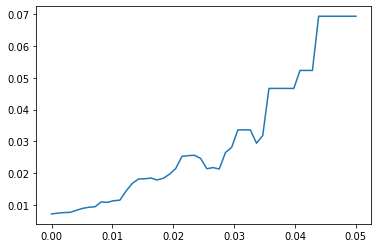

In [176]:
plt.plot(tvec, ret)
plt.show()

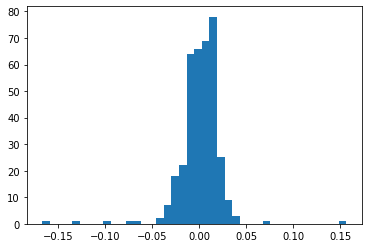

In [177]:
plt.hist(y_pred_real, bins=40)
plt.show()

## Production Files

In [200]:
model_specifiers = {
                    'tickers': [i.replace(f'_percent_change_{feat_days}', '') for i in feat_cols],
                    'feat_days': 5,
                    'pred_days': 5,
                   }

In [201]:
with open('modelfiles/MMM/predictor.pickle', 'wb') as f:
    pickle.dump(rf, f)
with open('modelfiles/MMM/scalerML.pickle', 'wb') as f:
    pickle.dump(scalerML, f)
with open('modelfiles/MMM/scalerReal.pickle', 'wb') as f:
    pickle.dump(scalerReal, f)
with open('modelfiles/MMM/PCA.pickle', 'wb') as f:
    pickle.dump(pca, f)
with open('modelfiles/MMM/model_specifiers.pickle', 'wb') as f:
    pickle.dump(model_specifiers, f)